# Various simulations related to the signature and the randomized signature

### Mechanism for Brownian Motion

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
from timeit import default_timer as timer

In [3]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w

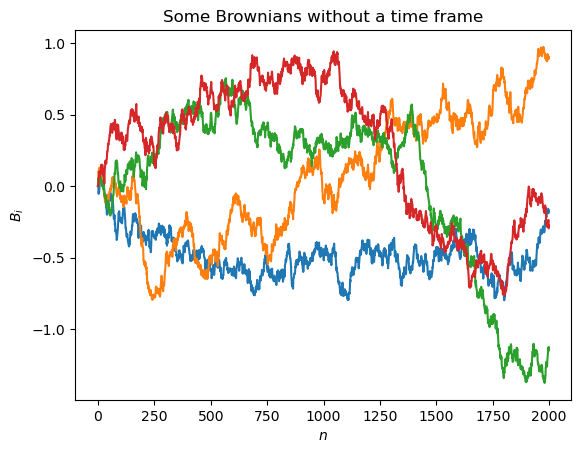

In [4]:
b = Brownian()
for i in range(4):
    plt.plot(1*b.gen_normal(2000))

plt.title("Some Brownians without a time frame")
plt.xlabel("$n$")
plt.ylabel("$B_i$")
plt.show()

### Mechanism for random matrices and vectors

In [5]:
A = np.random.normal(0, 1, size=(3, 2, 4))
v = np.random.normal(0, 1, size=(3))

In [6]:
A, v

(array([[[ 0.57568941, -1.70837203,  0.26731461, -1.5664458 ],
         [-0.36864678,  0.35136556, -1.20383717,  0.01645763]],
 
        [[ 1.20464735,  0.23929206, -0.06667565, -0.1786422 ],
         [ 0.51575659,  0.86815219, -0.80365788, -0.44499155]],
 
        [[-1.30264175,  1.07256536,  0.94241403, -0.89094638],
         [-0.35759478,  1.06817403, -0.28903352, -0.52024672]]]),
 array([-1.24408304,  0.24726457,  0.89371353]))

### Time&step structure

In [7]:
N = 10001
T = 1
step = T/N
x_axis = np.linspace(0, T, N)

ValueError: x and y must have same first dimension, but have shapes (10001,) and (101,)

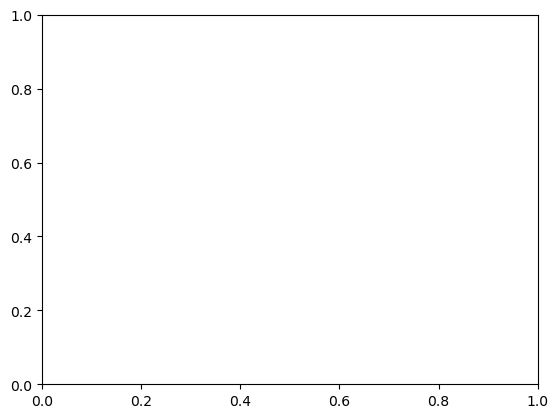

In [8]:
for i in range(4):
    plt.plot(x_axis, b.gen_normal(101))
plt.title("Some Brownians within time-frame")
plt.xlabel("$t$")
plt.ylabel("$B_t$")
plt.show()

## 1-Dimensional Stochastic Double Well

### Constructing the process

In [ ]:
b = Brownian()

theta, mu, sigma, y0 = 1, 2, 1, 1
Y = np.zeros(N)
Y[0] = y0
brow = b.gen_normal(N+1)
db =  np.diff(brow)

In [ ]:
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]

In [ ]:
plt.plot(x_axis, Y)
plt.title("Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Y_t$")
plt.show()

### Constructing the randomized signature

In [ ]:
k = 100
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1

In [ ]:
for i in range(N-1):
    Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]

In [ ]:
for i in range(5):
    plt.plot(x_axis, Z[:,i])

plt.title("Rand. signature of the Double Well process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

In [ ]:
Z.shape

### Training the linear, time-homogeneous readout - without regularization

In [ ]:
model1 = LinearRegression().fit(Z, Y)

In [ ]:
r_sq_1 = model1.score(Z, Y)
print(f"coefficient of determination: {r_sq_1}")

In [ ]:
print(f"intercept: {model1.intercept_}")

In [ ]:
print(f"coefficients: {model1.coef_}")

In [ ]:
Y_pred_1 = model1.predict(Z)

In [ ]:
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_1, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

In [ ]:
k

### Training the linear, time-homogeneous readout - with regularization

In [ ]:
model2 = Lasso(alpha=0.10)
model2.fit(Z, Y)

In [ ]:
r_sq_2 = model2.score(Z, Y)
print(f"coefficient of determination: {r_sq_2}")

In [ ]:
print(f"intercept: {model2.intercept_}")

In [ ]:
print(f"coefficients: {model2.coef_}")

In [ ]:
Y_pred_2 = model2.predict(Z)

In [ ]:
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_2, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

### Simulating n_sim times and testing out of sample with Gaussians

In [ ]:
n_sim = 1000
k = 50
A = np.random.normal(0, 1, size=(k, k))
b = np.random.normal(0, 1, size=k)
Y_big = np.zeros(N*n_sim)
Z_big = np.zeros((N*n_sim, k))
Y_big[0:N,] = np.ones(N)
Z_big[0:N,].shape

In [ ]:
for iter in range(n_sim):

    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N+1)
    db =  np.diff(brow)
    for i in range(N-1):
        Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    Z = np.zeros((N, k))
    Z[0][0] = 1
    for i in range(N-1):
        Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]
    Y_big[iter*N:(iter+1)*N] = Y
    Z_big[iter*N:(iter+1)*N,:] = Z

In [ ]:
model3 = Ridge(alpha=1.0)
model3.fit(Z_big, Y_big)

In [ ]:
r_sq_3 = model3.score(Z_big, Y_big)
print(f"coefficient of determination: {r_sq_3}")

In [ ]:
print(f"intercept: {model3.intercept_}")

In [ ]:
print(f"coefficients: {model3.coef_}")

In [ ]:
br = Brownian()
Y = np.zeros(N)
Y[0] = y0
brow = br.gen_normal(N+1)
db =  np.diff(brow)
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1
for i in range(N-1):
    Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]

In [ ]:
Y_pred_3 = model3.predict(Z)

In [ ]:
#Y_big[0:N]
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_3, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

In [ ]:
np.linalg.norm(Y-Y_pred_3)

### Simulating n_sim times and testing out of sample with Bernoullis

In [ ]:
n = 1
p = 0.5

In [ ]:
n_sim = 1000
k = 15
A = np.random.binomial(n, p, size=(k,k))*2 - 1
b = np.random.binomial(n, p, size=k)*2 - 1
Y_big = np.zeros(N*n_sim)
Z_big = np.zeros((N*n_sim, k))
Y_big[0:N,] = np.ones(N)
A

In [ ]:
for iter in range(n_sim):

    br = Brownian()
    Y = np.zeros(N)
    Y[0] = y0
    brow = br.gen_normal(N+1)
    db =  np.diff(brow)
    for i in range(N-1):
        Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
    dY = np.diff(Y)
    Z = np.zeros((N, k))
    Z[0][0] = 1
    for i in range(N-1):
        Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]
    Y_big[iter*N:(iter+1)*N] = Y
    Z_big[iter*N:(iter+1)*N,:] = Z

In [ ]:
model4 = Ridge(alpha=.01)
model4.fit(Z_big, Y_big)

In [ ]:
r_sq_4 = model4.score(Z_big, Y_big)
print(f"coefficient of determination: {r_sq_4}")

In [ ]:
print(f"intercept: {model4.intercept_}")

In [ ]:
print(f"coefficients: {model4.coef_}")

In [ ]:
br = Brownian()
Y = np.zeros(N)
Y[0] = y0
brow = br.gen_normal(N+1)
db =  np.diff(brow)
for i in range(N-1):
    Y[i+1] = Y[i] + theta * Y[i] * (mu - Y[i]*Y[i]) * step + sigma * db[i]
dY = np.diff(Y)
Z = np.zeros((N, k))
Z[0][0] = 1
for i in range(N-1):
    Z[i+1] = Z[i] + (A@Z[i] + b)*dY[i]

In [ ]:
Y_pred_4 = model4.predict(Z)

In [ ]:
#Y_big[0:N]
plt.plot(x_axis, Y)
plt.plot(x_axis, Y_pred_4, '--')
plt.title("True process and reconstruction")
plt.xlabel("$t$")
plt.ylabel("$Y_t$ and $\hat{Y}_t$")
plt.show()

In [ ]:
np.linalg.norm(Y-Y_pred_4)

## 4-Dimensional Ornstein–Uhlenbeck process

### Constructing the process

In [ ]:
y0_4, mu_4 = np.array([1,1,1,1]), np.array([1,1,1,1])
sigma_4 = np.array([[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])
theta_4 = np.array([[1,1/2,1/3,1/4], [2,1,2/3,2/4], [3,3/2,1,3/4], [4,2,4/3,1]])
Y_4 = np.zeros((N,4))
Y_4[0] = y0_4
brow_4 = np.zeros((N+1,4))
#sigma_4 = theta_4

In [ ]:
b_4 = Brownian()

for i in range(4):
    brow_4[:,i] = b_4.gen_normal(N+1)
db_4 = np.diff(brow_4, axis = 0)

In [ ]:
for i in range(N-1):
    Y_4[i+1] = Y_4[i] + (mu_4 - theta_4 @ Y_4[i]) * step + sigma_4 @ db_4[i]

In [ ]:
for i in range(4):
    plt.plot(x_axis, Y_4[:,i])

plt.title("4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature

In [ ]:
k_4 = 100
A_4 = np.random.normal(0, 1, size=(4, k_4, k_4))
b_4 = np.random.normal(0, 1, size=(4,k_4))
dY_4 = np.diff(Y_4, axis = 0)
Z_4 = np.zeros((N, k_4))
Z_4[0][0] = 1

In [ ]:
dY_4.shape

In [ ]:
for i in range(N-1):
    for j in range(4):
        Z_4[i+1] = Z_4[i] + (A_4[j]@Z_4[i] + b_4[j])*dY_4[i][j]

In [ ]:
for i in range(6):
    plt.plot(x_axis, Z_4[:,i])

plt.title("Rand. signature of the 4-Dimensional Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

## 10-Dimensional Made-Up process

In [ ]:
y0_10, mu_10 = np.ones(10), np.ones(10)
sigma_10 = np.eye(10)
theta_10 = np.zeros((10, 10))

for i in range(10):
    for j in range(10):
        theta_10[i][j] = (i+1)/(j+1)

In [ ]:
Y_10 = np.zeros((N,10))
Y_10[0] = y0_10
brow_10 = np.zeros((N+1,10))

In [ ]:
b_10 = Brownian()

for i in range(10):
    brow_10[:,i] = b_10.gen_normal(N+1)
db_10 = np.diff(brow_10, axis = 0)

In [ ]:
for i in range(N-1):
    Y_10[i+1] = Y_10[i] + (mu_10 - theta_10 @ Y_10[i]) * step + sigma_10 @ db_10[i]

In [ ]:
for i in range(10):
    plt.plot(x_axis, Y_10[:,i])

plt.title("10-Dimensional Made-Up process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature - 10-Dimensional Made-Up process

In [ ]:
k_10 = 10
A_10 = np.random.normal(0, 1, size=(10, k_10, k_10))
b_10 = np.random.normal(0, 1, size=(10, k_10))
dY_10 = np.diff(Y_10, axis = 0)
Z_10 = np.zeros((N, k_10))
Z_10[0][0] = 1

In [ ]:
dY_10.shape

In [ ]:
for i in range(N-1):
    for j in range(10):
        Z_10[i+1] = Z_10[i] + (A_10[j]@Z_10[i] + b_10[j])*dY_10[i][j]

In [ ]:
for i in range(10):
    plt.plot(x_axis, Z_10[:,i])

plt.title("Rand. signature of the 10-Dimensional Made-Up process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()

### $Nsim$-Dimensional generalized Ornstein–Uhlenbeck process

In [9]:
Nsim = 50 #free to choose dimensionality of the generalized process

In [10]:
y0_Nsim, mu_Nsim = np.ones(Nsim), np.ones(Nsim)
sigma_Nsim = np.eye(Nsim)
theta_Nsim = np.zeros((Nsim, Nsim))

for i in range(Nsim):
    for j in range(Nsim):
        theta_Nsim[i][j] = (i+1)/(j+1)

In [11]:
Y_Nsim = np.zeros((N,Nsim))
Y_Nsim[0] = y0_Nsim
brow_Nsim = np.zeros((N+1,Nsim))

In [12]:
b_Nsim = Brownian()

for i in range(Nsim):
    brow_Nsim[:,i] = b_Nsim.gen_normal(N+1)
db_Nsim = np.diff(brow_Nsim, axis = 0)

In [13]:
for i in range(N-1):
    Y_Nsim[i+1] = Y_Nsim[i] + (mu_Nsim - theta_Nsim @ Y_Nsim[i]) * step + sigma_Nsim @ db_Nsim[i]

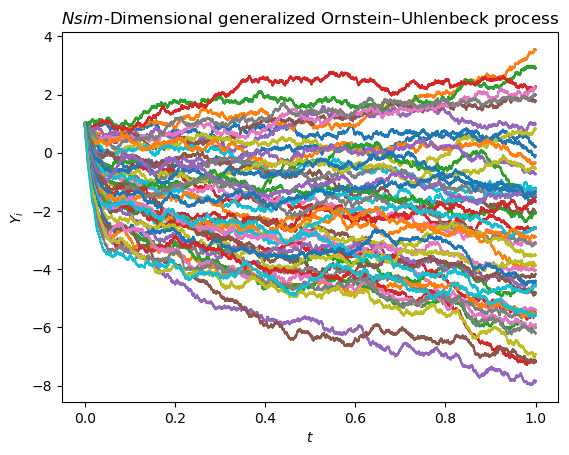

In [14]:
for i in range(Nsim):
    plt.plot(x_axis, Y_Nsim[:,i])

plt.title("$Nsim$-Dimensional generalized Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Y_i$")
plt.show()

### Constructing the randomized signature - $Nsim$-Dimensional generalized Ornstein–Uhlenbeck process

In [15]:
k_Nsim = 1000 #free to choose dimensionality of the rand. signature

In [16]:
A_Nsim = np.random.normal(0, 1, size=(Nsim, k_Nsim, k_Nsim))
b_Nsim = np.random.normal(0, 1, size=(Nsim, k_Nsim))
dY_Nsim = np.diff(Y_Nsim, axis = 0)
Z_Nsim = np.zeros((N, k_Nsim))
Z_Nsim[0][0] = 1

In [17]:
dY_Nsim.shape

(10000, 50)

In [18]:
start = timer()
for i in range(N-1):
    for j in range(Nsim):
        Z_Nsim[i+1] = Z_Nsim[i] + (A_Nsim[j]@Z_Nsim[i] + b_Nsim[j])*dY_Nsim[i][j]
end = timer()
print(end - start)

KeyboardInterrupt: 

In [ ]:
print(N)

In [ ]:
for i in range(15):
    plt.plot(x_axis, Z_Nsim[:,i])

plt.title("Rand. signature of the $Nsim$-Dimensional generalized Ornstein–Uhlenbeck process")
plt.xlabel("$t$")
plt.ylabel("$Z$")
plt.show()